In [127]:
import numpy as np

lc = np.genfromtxt("data/PG1302_CRTS.dat", names="mjd, mag, magerr", delimiter=",", skip_header=1)
#print(str(lc['mag']))

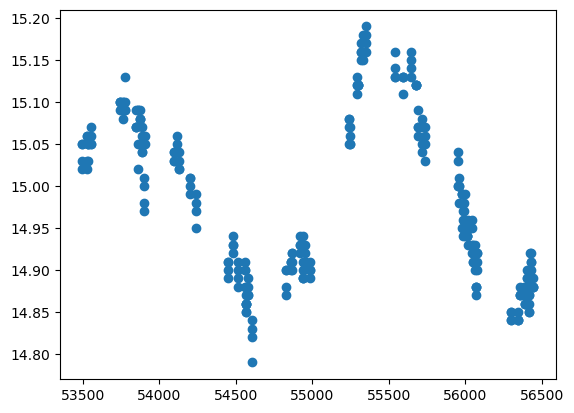

In [128]:
import matplotlib.pyplot as plt

t = lc["mjd"]
mag = lc["mag"]
magerr = lc['magerr']

plt.scatter(t, mag)
plt.show()

[ True False False False  True False  True False False False]


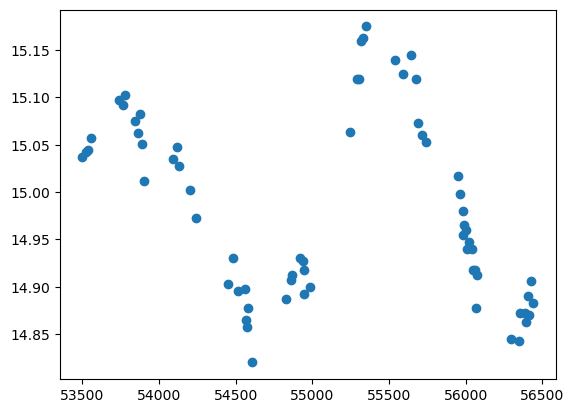

In [142]:
from scipy.stats import binned_statistic

# Use binned_statistic to calculate mean within each bin
num_bins=500
bin_mag, bin_edges, binnumber = binned_statistic(t, mag, statistic=np.nanmean, bins=num_bins)
bin_magerr, bin_edges, binnumber = binned_statistic(t, magerr, statistic=np.nanmean, bins=num_bins)
bin_width = (bin_edges[1] - bin_edges[0])
bin_t = bin_edges[1:] - bin_width/2

filter = np.isfinite(bin_mag)
print(str(filter[:10]))
bin_mag = bin_mag[filter]
bin_t = bin_t[filter]

plt.scatter(bin_t, bin_mag)
plt.show()

In [144]:
import astropy.units as u
from astropy.timeseries import LombScargle

freqs = np.linspace(1,3000,num_bins) 
print(str(freqs[:10]))
print(str(bin_t[:10]))
print(str(bin_mag[:10]))
ls = LombScargle(bin_t * u.day, bin_mag * u.mag, bin_magerr * u.mag)
powers = ls.power(freqs/ u.day)
#print(str(frequency))
plt.bar(freqs, powers)
plt.xlabel("Frequency (1/d)")
plt.ylabel("Power/Frequency")
plt.title("Lomb-Scargle Periodogram")
plt.show()
# TODO: Create bins (grouping of days) of lightcurve data with multiple bin sizes(eg 30d etc)
# TODO: Find the FAP (False probability)
# TODO: Test with different frequency bins

[ 1.          7.01002004 13.02004008 19.03006012 25.04008016 31.0501002
 37.06012024 43.07014028 49.08016032 55.09018036]
[53499.15095035 53522.71871315 53534.50259455 53558.07035735
 53740.72051905 53764.28828185 53776.07216325 53846.77545165
 53864.45127375 53876.23515515]
[15.0375 15.0425 15.045  15.0575 15.0975 15.0925 15.1025 15.075  15.0625
 15.0825]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (68,) and arg 2 with shape (500,).